<center> <h1>Universidad Nacional de San Agustín de Arequipa</h1> </center>
<center> <h1>Facultad de Ingeniería de Producción y Servicios</h1> </center>
<center> <h1>Escuela Profesional de Ingeniería de Telecomunicaciones</h1> </center>

<center> <h1> </h1> </center>

<center><img src="https://user-images.githubusercontent.com/19308295/115939517-f1c6fe80-a463-11eb-989c-812ab4942586.png" width="350" height="410"></center>

<center> <h2>Ingeniero Renzo Bolivar Docente</h2> </center>

## Integrantes:

* Colque Apaza, Esmeralda Tatiana
* Espinoza Turpo, Yeferson Gustavo
* Hirpanoca Turpo, Gueyson
* Quispe Bejar, Jairo Jorge
* Valencia Solari, Saul Paolo
* Valdivia Aragon, Marco Andree

<center> <h1>Curso : Computación 2</h1> </center>

![linea 1](https://user-images.githubusercontent.com/19308295/115926252-2b8a0c00-a448-11eb-9d9c-b43beaf0ff68.png)

<center> <h1>MIGRACIÓN EXCEL A PYTHON </h1> </center>

![linea 1](https://user-images.githubusercontent.com/19308295/115926252-2b8a0c00-a448-11eb-9d9c-b43beaf0ff68.png)

# Analizando datos de un libro de Excel con Python

## Lectura del libro de Excel y almacenamiento en DataFrame

In [21]:
import pandas as pd
excelPath = r'/home/hirpa/Descargas/dataset.xlsx'
dataframe = pd.read_excel(excelPath, 'Ventas')
print(dataframe)

      Id      Fecha  IdProducto    Marca  \
0      1 2021-12-12           8    Apple   
1      2 2021-07-26           9   Xiaomi   
2      3 2021-08-22          15  Samsung   
3      4 2021-07-19           1   Xiaomi   
4      5 2021-11-29           7    Apple   
..   ...        ...         ...      ...   
934  941 2021-10-01           6  Samsung   
935  942 2021-06-13          16  Samsung   
936  943 2021-08-02           4  Samsung   
937  944 2021-08-25          14   Xiaomi   
938  945 2021-08-09          13   Xiaomi   

                                              Producto  \
0    IPhone Apple XR 64 GB Negro Apple IPhone/ Appl...   
1    Smartphone Pocophone X3 Pro NFC Negro Fantasma...   
2    Smartphone Samsung Galaxy A32 128 GB Blanco De...   
3                          Smartphone Pocophone X3 Pro   
4       Smartphone iPhone X Apple de 64GB Desbloqueado   
..                                                 ...   
934  Smartphone Samsung Galaxy A72 128GB 6GB RAM Az...   
935    

In [23]:
#ahora haremos una manera de lectura más presententable del archivo .xlsx
dataframe.style

,Id,Fecha,IdProducto,Marca,Producto,Descripción,Categoría,Precio,Cantidad,Total
0,1,2021-12-12 00:00:00,8,Apple,IPhone Apple XR 64 GB Negro Apple IPhone/ Apple XR / 64 GB Negro,Memoria interna 128 gb Desbloqueado para cualquier compañía telefónica Nombre del sistema operativo IOS Capacidad de la batería 1.715 mAh Apple logró una vez más lo que parecía imposible: un smartphone con nuevas tecnologías y,"Menos de $14,999.00",9198.900000,4,36795.600000
1,2,2021-07-26 00:00:00,9,Xiaomi,Smartphone Pocophone X3 Pro NFC Negro Fantasma 256GB Dual Sim 8GB Ram Xiaomi Desbloqueado Xiaomi Poco Desbloqueado,"6,67 pulgadas 120 Hz, 240 Hz táctil, 450 nits,Gorilla Glass 6, HDR10 Procesador Qualcomm Snapdragon 860 RAM 8GB","Menos de $14,999.00",12128.900000,3,36386.700000
2,3,2021-08-22 00:00:00,15,Samsung,Smartphone Samsung Galaxy A32 128 GB Blanco Desbloqueado,"Pantalla de 6.4 pulgadas Cámara 64+8+5+5 MP Batería de 5,000 mAh con carga rápida 15W",Premium,5499.000000,4,21996.000000
3,4,2021-07-19 00:00:00,1,Xiaomi,Smartphone Pocophone X3 Pro,"6,67 pulgadas 120 Hz, 240 Hz táctil, 450 nits,Gorilla Glass 6, HDR10 Procesador Qualcomm Snapdragon 860 RAM 8GB","Menos de $6,999.00",5987.250000,2,11974.500000
4,5,2021-11-29 00:00:00,7,Apple,Smartphone iPhone X Apple de 64GB Desbloqueado,Tamaño de la Pantalla 5.8 Pulgadas Sistema Operativo iOS Resolucion 12MP,"Menos de $14,999.00",13987.100000,4,55948.400000
5,6,2021-09-03 00:00:00,12,Apple,iPhone 11 Apple 64 GB Negro,Pantalla de 6.1 pulgadas con liquid retina Sistema operativo iOS 13 Resolución de 1792 x 828,Premium,17999.000000,4,71996.000000
6,7,2021-06-11 00:00:00,13,Xiaomi,XIAOMI POCO X3 GT 8GB 128GB NEGRO Xiaomi Desbloqueado,Pantalla: 6.6 pulgadas Resolución: 1080 x 2400 pixeles Procesador: Octa-core 2.6 GHz,Premium,16999.000000,4,67996.000000
7,8,2021-11-11 00:00:00,4,Samsung,Smartphone Samsung Galaxy A32 4GB RAM 128GB ROM Negro Desbloqueado,"Pantalla de 6.4 pulgadas Cámara 64+8+5+5 MP Batería de 5,000 mAh con carga rápida 15W","Menos de $6,999.00",5787.120000,1,5787.120000
8,9,2021-01-09 00:00:00,4,Samsung,Smartphone Samsung Galaxy A32 4GB RAM 128GB ROM Negro Desbloqueado,"Pantalla de 6.4 pulgadas Cámara 64+8+5+5 MP Batería de 5,000 mAh con carga rápida 15W","Menos de $6,999.00",5787.120000,1,5787.120000
9,12,2021-08-08 00:00:00,9,Xiaomi,Smartphone Pocophone X3 Pro NFC Negro Fantasma 256GB Dual Sim 8GB Ram Xiaomi Desbloqueado Xiaomi Poco Desbloqueado,"6,67 pulgadas 120 Hz, 240 Hz táctil, 450 nits,Gorilla Glass 6, HDR10 Procesador Qualcomm Snapdragon 860 RAM 8GB","Menos de $14,999.00",12128.900000,3,36386.700000


## Calcular el total de ventas y equipos vendidos

In [35]:
tventas = dataframe['Total'].sum()
tunidades = len(dataframe.index)
print('UNIDADES VENDIDAS:   '   + str(tunidades))
print('VENTAS TOTALES:  '   + "${:0,.2f}".format(tventas) )

UNIDADES VENDIDAS:   939
VENTAS TOTALES:  $2,904,375,461.46


### Convertir a dataframe

In [57]:
valuesDict = {'Ventas totales ': [tventas],'Unidades vendidas ': [tunidades]}
resultFrame = pd.DataFrame.from_dict(valuesDict)
resultFrame.style


,Ventas totales,Unidades vendidas
0,2904375461.460000,939


## Ventas por marca

In [56]:
ventasbranch = dataframe.groupby('Marca')[['Cantidad','Total']].sum()
ventasbranch.style

,Cantidad,Total
Marca,,
Apple,64711,701952542.600000
Samsung,118526,1197025193.860000
Xiaomi,75143,1005397725.000000


## Marca con mayor ventas

In [60]:
mejormarca = ventasbranch['Total'].sort_values(ascending=False).head(1)
mejormarca = mejormarca.to_frame()
mejormarca.style

,Total
Marca,
Samsung,1197025193.860000


In [64]:
ventasbranch = dataframe.groupby('Marca')[['Cantidad']].sum()
ventasbranch.style

,Cantidad
Marca,
Apple,64711
Samsung,118526
Xiaomi,75143


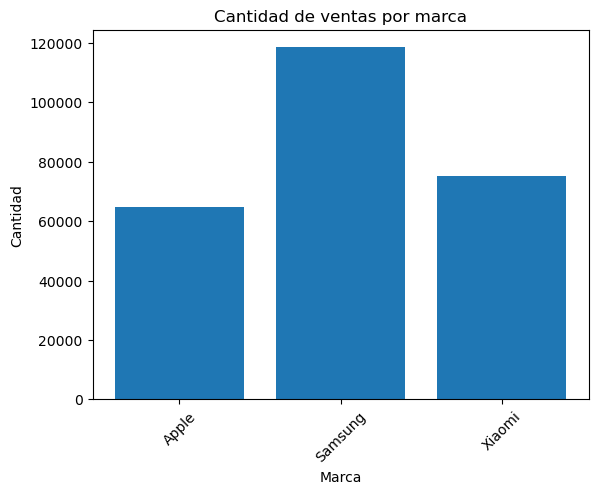

In [70]:
import matplotlib.pyplot as plt

marcas = ['Apple', 'Samsung', 'Xiaomi']
cantidad = [64711, 118526, 75143]

plt.bar(marcas, cantidad)
plt.title('Cantidad de ventas por marca')
plt.xlabel('Marca')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)

plt.show()

## Guardar dataframes en un nuevo libro de excel

In [71]:
#Creamos un archivo nuevo llamado Nuevo reporte, con los dataframes que hemos creado
writer = pd.ExcelWriter('Nuevo reporte.xlsx', engine="xlsxwriter")
resultFrame.to_excel(writer,sheet_name='Resultados',index=False)
ventasbranch.to_excel(writer,sheet_name='Resumen por marca',startcol=1,startrow=1)
mejormarca.to_excel(writer,sheet_name='Marca más vendida')

writer.save()

/tmp/ipykernel_2454/3782948055.py:7: FutureWarning: save is not part of the public API, usage can give unexpected results and will be removed in a future version
  writer.save()
